<a href="https://colab.research.google.com/github/Ammar-2711/Ammar-Abdul-Razzaq-Design-anAI-Based-Hybrid-Intrusion-Detection-System-IDS/blob/main/4333591.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial shape: (2830743, 79)
After cleaning: (2827876, 79)
Available columns: Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packe

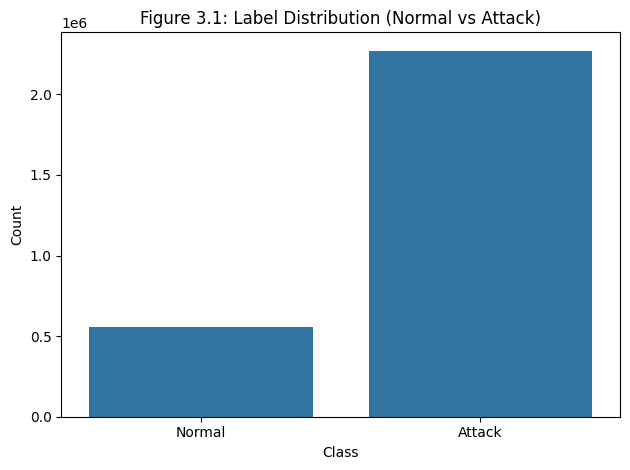

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# List of your dataset paths from /content/
filenames = [
    "/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "/content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "/content/Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "/content/Monday-WorkingHours.pcap_ISCX.csv",
    "/content/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "/content/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "/content/Tuesday-WorkingHours.pcap_ISCX.csv",
    "/content/Wednesday-workingHours.pcap_ISCX.csv"
]

# Step 1: Combine all CSVs into one DataFrame
df = pd.concat([pd.read_csv(f, low_memory=False) for f in filenames], ignore_index=True)
print("Initial shape:", df.shape)

# Step 2: Clean dataset
# Drop near-empty columns
df.dropna(axis=1, thresh=0.8 * len(df), inplace=True)

# Replace 'Infinity', 'NaN', inf values with actual NaNs
df.replace([np.inf, -np.inf, 'Infinity', 'NaN'], np.nan, inplace=True)

# Drop any remaining NaNs
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print("After cleaning:", df.shape)

# Fix any column name issues (e.g., " Label" or hidden space)
df.columns = df.columns.str.strip()  # remove leading/trailing spaces

# Check if 'Label' is now correctly present
print("Available columns:", df.columns)

# Now apply the binary label transformation
df['Label'] = df['Label'].apply(lambda x: 'Normal' if x == 'BENIGN' else 'Attack')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])  # Normal = 0, Attack = 1

print("Label distribution:\n", df['Label'].value_counts())

# Step 4: Feature scaling
df.drop(['Flow ID', 'Source IP', 'Destination IP', 'Timestamp'], axis=1, errors='ignore', inplace=True)

X = df.drop('Label', axis=1)
y = df['Label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Dataset is ready for model training.")


sns.countplot(x='Label', data=df)
plt.title("Figure 3.1: Label Distribution (Normal vs Attack)")
plt.xticks([0, 1], ['Normal', 'Attack'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



Accuracy: 0.9988200805551397

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    167349
           1       1.00      1.00      1.00    681014

    accuracy                           1.00    848363
   macro avg       1.00      1.00      1.00    848363
weighted avg       1.00      1.00      1.00    848363



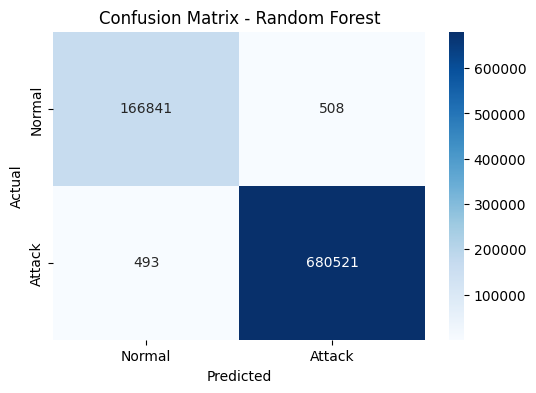

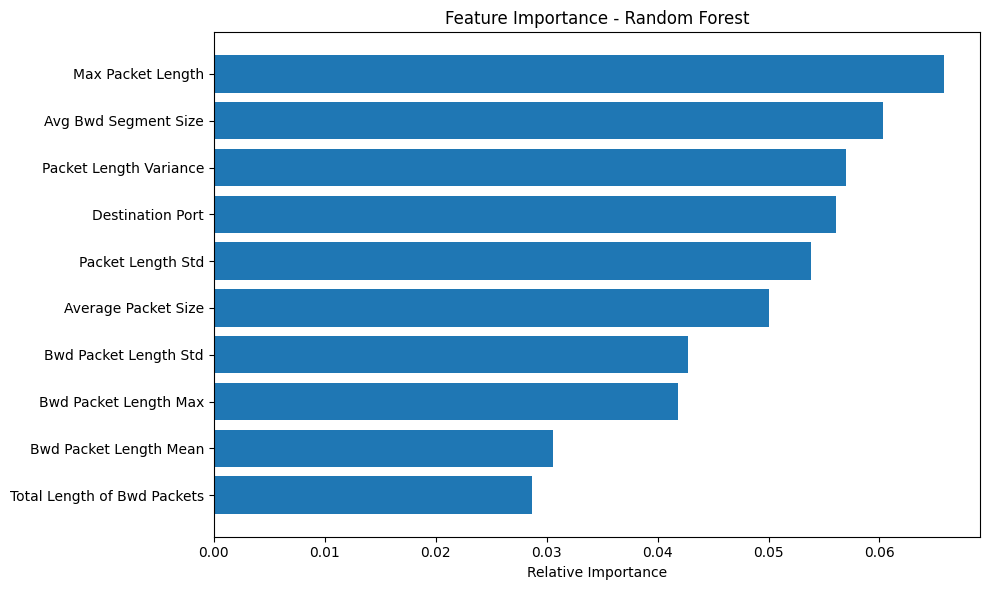

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 3: Predictions
y_pred = rf.predict(X_test)

# Step 4: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
# Step 6: Feature Importance Plot
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 important features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


Epoch 1/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.2587 - val_loss: 0.0681
Epoch 2/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0487 - val_loss: 0.0561
Epoch 3/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0434 - val_loss: 0.0536
Epoch 4/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0388 - val_loss: 0.0542
Epoch 5/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0368 - val_loss: 0.0546
Epoch 6/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0353 - val_loss: 0.0535
Epoch 7/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0379 - val_loss: 0.0526
Epoch 8/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0418 - val_loss: 0.0520
Epoch 9/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0405 - val_loss: 0.0522
Epoch 10/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0391 - val_loss: 0.0540
Epoch 11/20
6957/6957 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0389 - val_loss: 0.0531
Epoch 12/20
6957/69

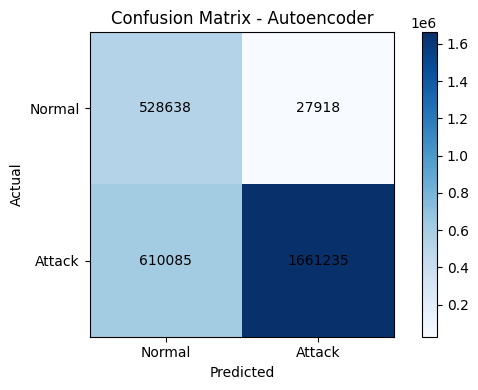

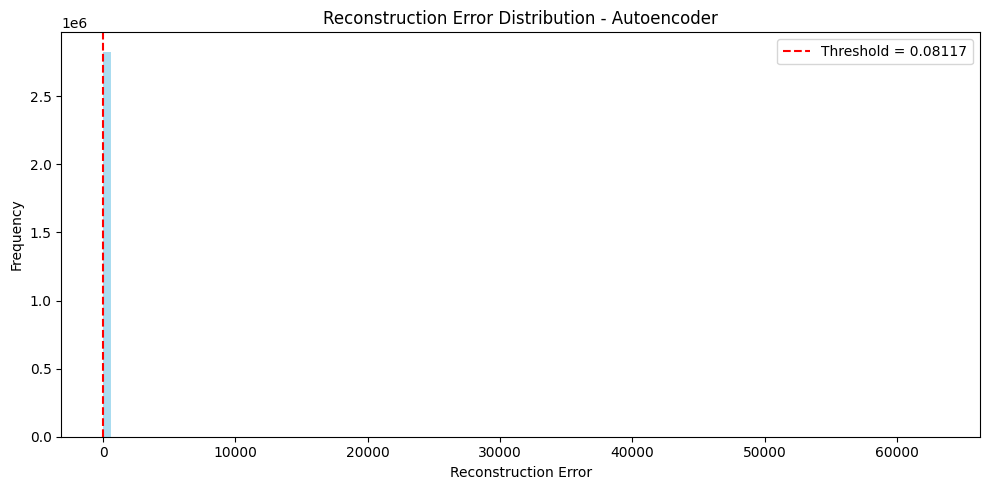

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

# Step 1: Split normal data for unsupervised training
X_normal = X_scaled[y == 0]
X_train_ae, X_val_ae = train_test_split(X_normal, test_size=0.2, random_state=42)

# Step 2: Define Autoencoder
input_dim = X_train_ae.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(14, activation="tanh", activity_regularizer=regularizers.l1(1e-5))(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Train Autoencoder
history = autoencoder.fit(X_train_ae, X_train_ae,
                          epochs=20,
                          batch_size=64,
                          shuffle=True,
                          validation_data=(X_val_ae, X_val_ae),
                          verbose=1)

# Step 4: Predict & calculate reconstruction error
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred, 2), axis=1)

# Step 5: Set threshold based on 95th percentile of validation errors
val_pred = autoencoder.predict(X_val_ae)
val_mse = np.mean(np.power(X_val_ae - val_pred, 2), axis=1)
threshold = np.percentile(val_mse, 95)

# Step 6: Classify anomalies
y_pred_ae = [1 if e > threshold else 0 for e in mse]

# Step 7: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_ae))
print("\nClassification Report:\n", classification_report(y, y_pred_ae))

# Step 8: Plot confusion matrix
cm = confusion_matrix(y, y_pred_ae)
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Autoencoder")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Attack'])
plt.yticks([0, 1], ['Normal', 'Attack'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.tight_layout()
plt.show()
# NEW STEP: Plot reconstruction error distribution with threshold
plt.figure(figsize=(10, 5))
plt.hist(mse, bins=100, color='skyblue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.5f}')
plt.title("Reconstruction Error Distribution - Autoencoder")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()



Confusion Matrix:
[[ 500904   55652]
 [1667869  603451]]

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.90      0.37    556556
           1       0.92      0.27      0.41   2271320

    accuracy                           0.39   2827876
   macro avg       0.57      0.58      0.39   2827876
weighted avg       0.78      0.39      0.40   2827876



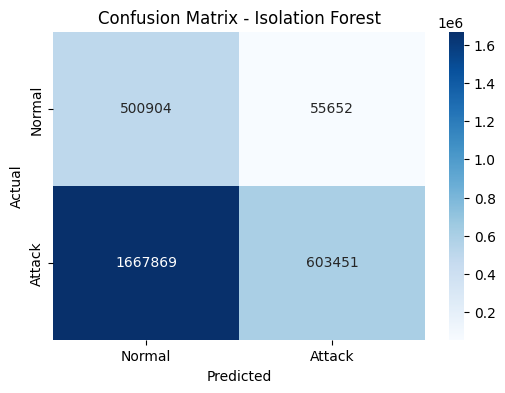

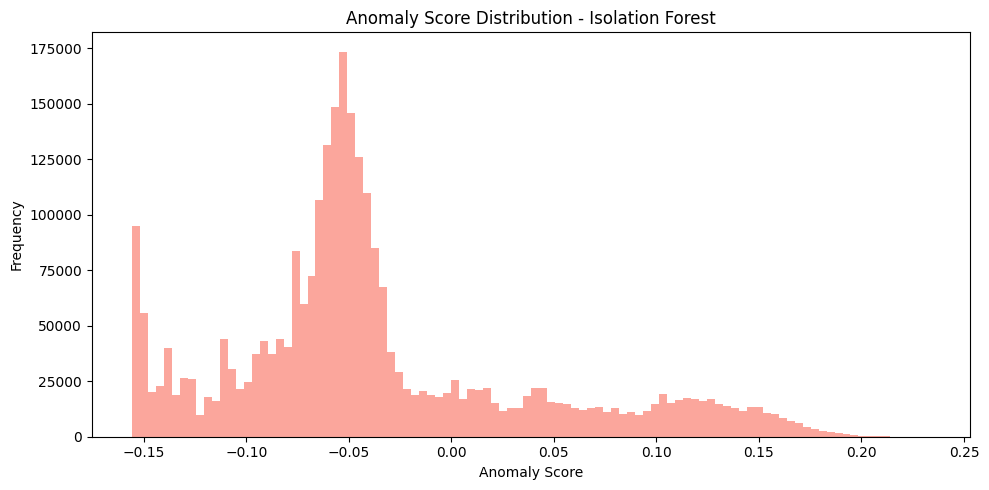

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Train Isolation Forest on only 'Normal' traffic
X_normal = X_scaled[y == 0]
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_normal)

# Step 2: Predict on full dataset
y_pred_iso = iso_forest.predict(X_scaled)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)  # -1 = anomaly = Attack, 1 = normal => switch to 1 = attack

# Step 3: Evaluate
print("Confusion Matrix:")
cm_iso = confusion_matrix(y, y_pred_iso)
print(cm_iso)

print("\nClassification Report:")
print(classification_report(y, y_pred_iso))

# Step 4: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Isolation Forest")
plt.show()
# Optional: Plot Anomaly Scores
scores = iso_forest.decision_function(X_scaled) * -1  # Invert so that higher = more anomalous
plt.figure(figsize=(10, 5))
plt.hist(scores, bins=100, color='salmon', alpha=0.7)
plt.title("Anomaly Score Distribution - Isolation Forest")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



✅ Linear SVM Accuracy: 0.9471871687219631

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    166930
           1       0.97      0.92      0.95    167004

    accuracy                           0.95    333934
   macro avg       0.95      0.95      0.95    333934
weighted avg       0.95      0.95      0.95    333934



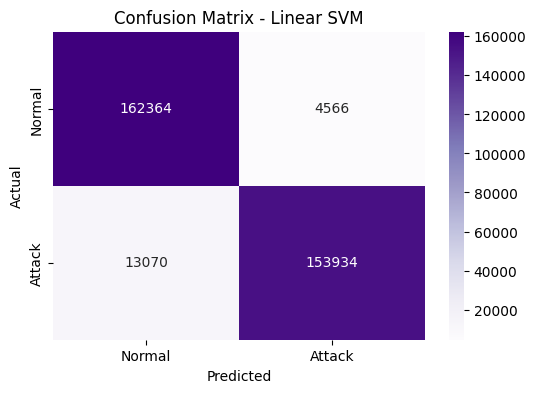

In [5]:
# --- Balance the Dataset ---
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

normal_idx = np.where(y == 0)[0]
attack_idx = np.where(y == 1)[0]
n = min(len(normal_idx), len(attack_idx))
balanced_idx = np.concatenate([normal_idx[:n], attack_idx[:n]])
X_balanced = X_scaled[balanced_idx]
y_balanced = y.iloc[balanced_idx]

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# --- Train the Linear SVM Model ---
svm_model = LinearSVC(max_iter=10000, random_state=42)
svm_model.fit(X_train, y_train)

# --- Predictions & Evaluation ---
y_pred = svm_model.predict(X_test)
print("✅ Linear SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM")
plt.show()

In [6]:
import joblib

# ✅ Save Random Forest
joblib.dump(rf, "rd_predict.pkl")

# ✅ Save SVM (Linear SVM)
joblib.dump(svm_model, "svm_predict.pkl")

# ✅ Save Isolation Forest
joblib.dump(iso_forest, "iso_predict.pkl")

# ✅ Save Autoencoder
autoencoder.save("ae_predict.h5")


88372/88372 ━━━━━━━━━━━━━━━━━━━━ 95s 1ms/step
✅ Hybrid IDS - Evaluation

Confusion Matrix:
 [[ 552563    3993]
 [ 211937 2059383]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.99      0.84    556556
           1       1.00      0.91      0.95   2271320

    accuracy                           0.92   2827876
   macro avg       0.86      0.95      0.89   2827876
weighted avg       0.94      0.92      0.93   2827876



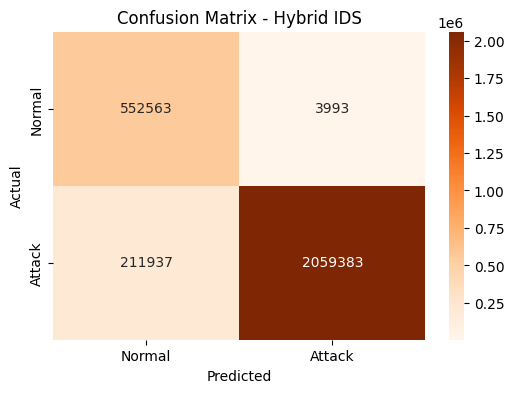

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Get individual model predictions ---

# --- Random Forest ---
rf_preds = rf.predict(X_scaled)

# --- Autoencoder ---
X_pred_ae = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - X_pred_ae, 2), axis=1)
threshold = np.percentile(mse, 95)
ae_preds = np.where(mse > threshold, 1, 0)  # 1 = Attack, 0 = Normal

# --- Isolation Forest ---
iso_preds = iso_forest.predict(X_scaled)
iso_preds = np.where(iso_preds == -1, 1, 0)  # Convert -1 (anomaly) → 1 (attack)

# --- SVM ---
svm_preds = svm_model.predict(X_scaled)  # Trained on balanced data, still valid for hybrid

# --- Step 2: Combine all predictions ---
# Ensemble Voting: If 2 or more models predict attack → final label is attack
combined_preds = (
    rf_preds +
    ae_preds +
    iso_preds +
    svm_preds
)

hybrid_preds = np.where(combined_preds >= 2, 1, 0)  # Majority vote threshold: 2+

# --- Step 3: Evaluation ---
print("✅ Hybrid IDS - Evaluation")
cm_hybrid = confusion_matrix(y, hybrid_preds)
print("\nConfusion Matrix:\n", cm_hybrid)
print("\nClassification Report:\n", classification_report(y, hybrid_preds))

# --- Step 4: Confusion Matrix Plot ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Oranges', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Hybrid IDS")
plt.show()


In [8]:
# ─── 1. Install necessary packages ──────────────────────────────────
!pip install streamlit pyngrok scikit-learn joblib tensorflow --quiet

# ─── 2. Full Working Code ────────────────────────────────────────────
from pyngrok import ngrok, conf
import threading, time, os

# ✅ Set your ngrok authtoken
conf.get_default().auth_token = "2zmwxNqqqy1NGKSgHNrxpslFzaU_4Sfb3mmLfYJmTPrDctM5S"

# ─── 3. Write Streamlit app to file ─────────────────────────────────
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import pandas as pd
import numpy as np
import joblib, tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# ✅ Load models with correct filenames
rf_model = joblib.load("rd_predict.pkl")
svm_model = joblib.load("svm_predict.pkl")
iso_model = joblib.load("iso_predict.pkl")
autoencoder_model = tf.keras.models.load_model("ae_predict.h5")

# ─ UI ─
st.set_page_config(page_title="AI-based IDS", layout="wide")
st.title("🔐 AI-Powered Intrusion Detection System (IDS)")
st.markdown("Upload **multiple CICIDS2017 CSV files**. A hybrid ML model will flag attacks.")

files = st.file_uploader("📁 Upload CSV files", type=["csv"], accept_multiple_files=True)

if files:
    dfs = []
    for file in files:
        try:
            df = pd.read_csv(file)
            st.success(f"✅ Loaded: {file.name} ({df.shape[0]} rows)")
            dfs.append(df)
        except Exception as e:
            st.error(f"❌ Error loading {file.name}: {e}")
    if not dfs:
        st.stop()

    # Combine all data
    df = pd.concat(dfs, ignore_index=True)

    # Save label if exists
    if 'Label' in df.columns:
        df['True_Label'] = df['Label']
        df.drop(columns=['Label'], inplace=True)

    # Drop unnecessary columns
    drop_cols = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']
    df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True, errors='ignore')

    st.subheader("🔍 Data Types")
    st.write(df.dtypes)

    # Keep only numeric
    df = df.select_dtypes(include=[np.number])
    if df.empty:
        st.error("❌ No numeric columns left after cleaning.")
        st.stop()

    # Preprocess
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    X = StandardScaler().fit_transform(SimpleImputer(strategy='mean').fit_transform(df))

    # ─ Predictions ─
    rf_preds  = rf_model.predict(X)
    svm_preds = svm_model.predict(X)
    iso_preds = np.where(iso_model.predict(X) == -1, 1, 0)
    ae_recon = autoencoder_model.predict(X)
    ae_mse = np.mean(np.square(X - ae_recon), axis=1)
    ae_thresh = np.percentile(ae_mse, 95)
    ae_preds = np.where(ae_mse > ae_thresh, 1, 0)

    # ─ Hybrid Voting ─
    votes = rf_preds + svm_preds + iso_preds + ae_preds
    hybrid = np.where(votes >= 2, 1, 0)

    st.subheader("🧠 Model Attack Counts")
    st.write({
        "Random Forest": int(rf_preds.sum()),
        "SVM"         : int(svm_preds.sum()),
        "Isolation Forest": int(iso_preds.sum()),
        "Autoencoder" : int(ae_preds.sum())
    })
    st.markdown("📌 **Hybrid Rule:** If 2 or more models say 'Attack', it's marked as Attack.")

    # ─ Result Table ─
    result_df = pd.DataFrame({
        "RF"   : rf_preds,
        "SVM"  : svm_preds,
        "ISO"  : iso_preds,
        "AE"   : ae_preds,
        "Votes": votes,
        "Prediction": np.where(hybrid == 1, "Attack", "Normal")
    })
    if 'True_Label' in df.columns:
        result_df['True_Label'] = df['True_Label']

    st.subheader("✅ Prediction Summary")
    st.write(result_df["Prediction"].value_counts().rename_axis("Type").reset_index(name="Count"))

    st.subheader("📋 Sample Predictions")
    st.write(result_df.head(20))

    # ─ Download Button ─
    st.download_button("📥 Download Results as CSV",
                       result_df.to_csv(index=False).encode("utf-8"),
                       file_name="IDS_predictions.csv",
                       mime="text/csv")
""")

# ─── 4. Start Streamlit in background thread ────────────────────────
def run_app(): os.system("streamlit run app.py")
thread = threading.Thread(target=run_app); thread.start()

# ─── 5. Open ngrok tunnel ───────────────────────────────────────────
time.sleep(5)
public_url = ngrok.connect(8501, "http")
print("🌐 Your Streamlit app is live at:", public_url)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00
🌐 Your Streamlit app is live at: NgrokTunnel: "https://7eb3784c2caa.ngrok-free.app" -> "http://localhost:8501"
